In [1]:
%run statistics.py
%run linear_algebra.py

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') ## R ggplot style
import numpy as np

In [3]:
## 주피터노트북 cell 너비 조정

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# 1. 미분법

## 미분 공식

### (1) 상수

> - 상수를 미분하면 0이 된다.  
> - $ \dfrac{d}{dx}(c) = 0 $

### (2) 거듭제곱

> - $x$의 $n$ 제곱을 미분하면 $n-1$ 제곱으로 제곱수가 1씩 감소한다. 
- 이 공식은 $n$이 자연수이거나 음의 정수일 때 성립한다. $n=0$일 때는 성립하지 않는다.  
> - $ \dfrac{d}{dx}(x^n) = n x^{n-1} $

### (3) 로그

> - 로그함수를 미분하면 $x^{-1}$이 된다.  
> - $ \dfrac{d}{dx}(\log x) = \dfrac{1}{x} $

### (4) 지수

> - 밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.  
> - $ \dfrac{d}{dx}(e^x) = e^x $

## sympy를 활용한 미분
- SymPy는 심볼릭 연산(symbolic operation)을 지원하기 위한 파이썬 패키지이다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉,  $x^2$ 의 미분 연산을 수행하면 그 결과가  $2x$ 란 형태로 출력된다. 딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 theano 패키지나 tensorflow 패키지도 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다.

In [4]:
import sympy

In [5]:
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')  

In [6]:
## latex 표현 중지
# sympy.init_printing(pretty_print=False)  

In [7]:
x = sympy.symbols('x')
x

x

In [8]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [9]:
## 미분

f.diff(x)

   x    x
x⋅ℯ  + ℯ 

In [10]:
## 연산된 결과를 계산
## subs(old, new) : 기존 변수를 새로운 변수로 교체한다.

f.diff(x).subs(x, 2).evalf()

22.1671682967919

In [11]:
## 함수로 만들어서 계산
## lambdify : 수치 계산을 위한 람다 함수를 만들어준다.


x = sympy.symbols('x')
y = sympy.symbols('y')
f = x+y

func = sympy.lambdify((x, y), f, modules=['numpy'])

In [12]:
func(3, 10)

13

----------

In [13]:
## 지수함수 미분
## e^x를 미분하세요

In [32]:
#### 스터디원 코드 ####
x = 
f = 

In [ ]:
## 합성함수의 미분
## xf(x) 미분를 x에 대해 미분해보세요
## sympy.Function 사용

In [ ]:
#### 스터디원 코드 ####
x = 
f = 

------------

## 편미분

In [ ]:
## 편미분
## x^2 + xy + y^2를 y에 대해 미분하세요

In [ ]:
#### 스터디원 코드 ####
x =
y = 
f = 

In [ ]:
## 편미분
## x^2 + xy + y^2를 y에 대해 미분한 후, x에 대해 미분하세요


In [ ]:
#### 스터디원 코드 ####
x =
y = 
f = 


참고 자료 : https://www.slideshare.net/dahlmoon/jupyter-notebok-20160630

## 2. 경사하강법
> ### 파이썬 구현
- 편미분 
- 그레디언트
- 스텝

### [경사하강법]
<img src="http://cfile9.uf.tistory.com/image/223B87385890215809726D" alt="Drawing" style="width: 600px;" align = "left"/>

<img src="https://datascienceschool.net/upfiles/8dc79df23e7e48729cb252f5a09d1a97.png" alt="Drawing" style="width: 600px;" align = "right"/>

- Gradient Descent 방법은 다음과 같이 단순히 현재 위치에서의 기울기 값  $g(x_k)=\frac {df(x_k)}{dx}$  만을 이용한다.
- $x_{k+1}=x_k−αg(x_k)$

In [15]:
## x^2 함수에 대해 경사하강법을 적용한다.

def convex_function(x):
    return x**2

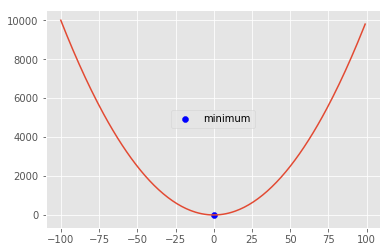

In [16]:
xs = [i for i in range(-100, 100)]
# plt.plot(xs, [convex_function(i) for i in range(-100, 100)])
plt.plot(xs, [convex_function(i) for i in xs])
plt.scatter(0, 0, color = 'blue', label = 'minimum')
plt.legend(loc = 'center')
plt.show()

> ### (0, 0) 을 최솟값으로 갖는다. 경사하강법을 통해 이 점을 잘 찾아가는지 살펴보자.

In [17]:
## 편미분
def partial_difference_quotient(f, v, i, h):
    """ 함수 f에서 v의 i번째 값의 편미분값"""
    if i > len(v):
        print('Value Error')
        
    else:
        v_j = v[i]
        w = v_j + h
        
        return (f(w) - f(v_j)) / h

In [ ]:
#### 스터디원 코드 ####



In [18]:
## 그레디언트
## 각 위치의 편미분값들을 구한다.

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [19]:
#### 스터디원 코드 ####



In [20]:
##
v = np.linspace(-10, 10, num = 100) ## 정해진 범위 안에서 균등한 간격으로 n개의 유리수를 생성한다.

partial_difference_quotient(convex_function, v, 10, 0.0001)

-15.959495959521064

In [21]:
def step(v, direction, step_size):
    """ v 에서 step_size 만큼 이동"""

    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

In [22]:
#### 스터디원 코드 ####



In [23]:
import random
tolerance = 0.00001
v = [random.randint(-10, 10) for i in range(2)]
i = 0
while True:
    i += 1
    gradient = estimate_gradient(convex_function, v) # 임의의 시작점에서 gradient 계산
    next_v = step(v, gradient, -0.01)                # gradient 반대 방향으로 0.01 만큼 이동
    if distance(next_v, v) < tolerance:              # v와 next_v 간의 편차 (거리)가 허용치보다 적을 경우 멈춘다.
        break
    v = next_v
print('[%s 번째 시행] ' %str(i), '편차 :', distance(next_v, v), '최솟값 위치 : ', v)

[472 번째 시행]  편차 : 9.888211771888768e-06 최솟값 위치 :  [-0.00044721405285108666, 0.00021610757919011663]


In [ ]:
#### 스터디원 코드 ####



> ### 잘 찾아가는지 확인해보자.

In [24]:
def gradient_descent_plot():
    result_arr = []
    tolerance = 0.00001
    v = [random.randint(-100, 100) for i in range(2)]
    starting_point = v[:]

    while True:
        gradient = estimate_gradient(convex_function, v) 
        next_v = step(v, gradient, -0.01)
        if distance(next_v, v) < tolerance:              
            break
        v = next_v
        result_arr.append([v[0], convex_function(v[0])]) # 움직임 저장
    print('시작위치 :', starting_point, '[%s 번 시행] ' %str(i), '편차 :', distance(next_v, v), '최솟값 위치 : ', v)
    plt.scatter([x[0] for x in result_arr], [x[1] for x in result_arr])
    plt.show()

시작위치 : [-82, 90] [472 번 시행]  편차 : 9.984427667606147e-06 최솟값 위치 :  [-0.00034122058617140725, 0.0003640226375965303]


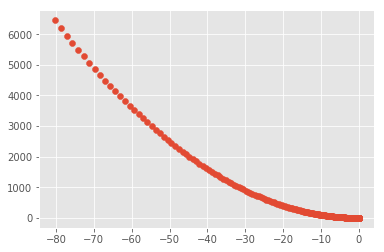

In [25]:
gradient_descent_plot()

> ### 최솟값을 찾아가기 위해 convex function의 모든 값을 다 훑고있다.
### step size를 조정한다면?
- step size가 너무 작을 때 : 계산 시간이 너무 오래걸림.
- step size가 너무 클 때 : 너무 많이 이동해서 발산될 위험이 있음.    
>> ### 적절한 거리를 미리 정해두고 가장 합리적인 값을 선택해보자.

In [26]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

In [27]:
def safe(f):
    """f와 똑같은 함수를 반환하지만 f에 오류가 발생하면 무한대를 반환해준다."""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # "infinity"
    return safe_f

In [28]:
def minimize_batch(target_fn, origin_fn, gradient_fn, theta_0, tolerance=0.000001):
    """target_fn을 최소화 시킬 수 있는 theta를 찾기 위해 gradient descent를 사용한다."""
    from functools import partial
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # theta를 시작점으로 설정
    target_fn = safe(target_fn)               # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta)                  # 최소화시키려는 값
    gradient_fn = partial(estimate_gradient, convex_function)  ## 그레디언트 함수 x^2 -> 2x
    i = 0
    while True:
        i += 1
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes] # step size에 따라 모두 계산

        # 함수를 최소화시키는 theta 선택
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # tolerance 만큼 수렴하면 멈춘다.
        if abs(value - next_value) < tolerance:
            return print('[%s 번째 시행] ' %str(i), '편차 :', abs(value - next_value), '최솟값 위치 : ', theta)
        else:
            theta, value = next_theta, next_value
        

In [29]:
v = [random.randint(-100,100) for i in range(2)]
print ('시작위치 :', v)
minimize_batch(sum_of_squares, convex_function, estimate_gradient, v)

시작위치 : [-33, 70]
[50 번째 시행]  편차 : 6.849190637470752e-07 최솟값 위치 :  [-0.0005937395840641268, 0.0012438418201092078]


In [ ]:
#### 스터디원 코드 ####



> ### 시행횟수는 1/10으로 줄었다.

In [30]:
## 시각화
def minimize_batch_plot(target_fn, origin_fn, gradient_fn, theta_0, tolerance=0.000001):
    """target_fn을 최소화 시킬 수 있는 theta를 찾기 위해 gradient descent를 사용한다."""
    from functools import partial
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # theta를 시작점으로 설정
    target_fn = safe(target_fn)               # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta)                  # 최소화시키려는 값
    gradient_fn = partial(estimate_gradient, convex_function)  ## 그레디언트 함수 x^2 -> 2x
    plot_arr = []
    i = 0
    while True:
        i += 1
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes] # step size에 따라 모두 계산

        # 함수를 최소화시키는 theta 선택
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # tolerance 만큼 수렴하면 멈춘다.
        if abs(value - next_value) < tolerance:  ## 이전 value와 다음 value의 편차를 계산함 -> 편미분값이나 마찬가지임
            break
        else:
            theta, value = next_theta, next_value
        plot_arr.append([theta[0], origin_fn(theta[0])])
    print('[%s 번 시행] ' %str(i), '최솟값 위치 : ', theta)
    plt.scatter([x[0] for x in plot_arr], [x[1] for x in plot_arr])
    plt.show()

시작 위치 :  [47, 2209]
[48 번 시행]  최솟값 위치 :  [0.0013051689196703156, -0.0007576500111309458]


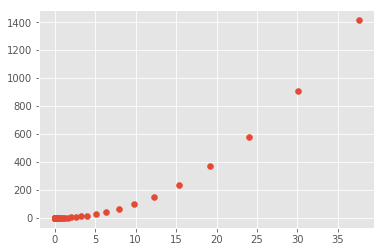

In [31]:
v = [random.randint(-100,100) for i in range(2)]
print('시작 위치 : ', [v[0], convex_function(v[0])])
minimize_batch_plot(sum_of_squares, convex_function, estimate_gradient, v)

> ### 시행횟수는 1/10으로 줄어들었다.
### 이와 같은 방식을 Batch Gradient Descent 라고 한다.
### $θ:=θ−η∇θJ(θ)$

## 3. 여러가지 경사하강법


### (1) SGD ( Stochastic Gradient Descent )
- Batch Gradient Descent 는 Loss function을 계산할 때 train set 전체를 사용한다.
- 그러나 이렇게 계산을 할 경우 한번 step을 내딛을 때 전체 데이터에 대해 Loss Function을 계산해야 하므로 너무 많은 계산량이 필요하다. 
- 이를 방지하기 위해 보통은 Stochastic Gradient Descent (SGD) 라는 방법을 사용한다. 
- 이 방법에서는 loss function을 계산할 때 전체 데이터(batch) 대신 일부 조그마한 데이터의 모음(mini-batch)에 대해서만 loss function을 계산한다.
    - 위에서 구현한 방법은 모델 최적화 관점에서 만들어진 것이 아니므로 loss function이 train set 전체를 사용하지 않는다.
- 장점
    - 빠른 연산 속도
- 단점
    - 다소 부정확함 (하지만 여러번 반복하면 batch 결과에 수렴함)

### (2) Momentum
-  Gradient Descent를 통해 이동하는 과정에 일종의 ‘관성’을 주는 것이다. 현재 Gradient를 통해 이동하는 방향과는 별개로, 과거에 이동했던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동하는 방식이다. 
- $v_t$를 time step t에서의 이동 벡터라고 할 때, 아래와 같은 식으로 이동을 표현할 수 있다.
    - $v_t=γv_{t−1}+η∇θJ(θ)$
    - $\theta = \theta - v_t$
- $γ$는 얼마나 momentum을 줄 것인지에 대한 momentum term으로서, 보통 0.9 정도의 값을 사용한다. 식을 살펴보면 과거에 얼마나 이동했는지에 대한 이동 항 $v$를 기억하고, 새로운 이동항을 구할 경우 과거에 이동했던 정도에 관성항만큼 곱해준 후 Gradient을 이용한 이동 step 항을 더해준다.
- 아래와 같이 SGD가 Oscilation 현상을 겪을 때 더욱 빛을 발한다.

### SGD vs Momentum
<img src="http://ruder.io/content/images/2015/12/without_momentum.gif" alt="Drawing" style="width: 600px;" align = "left"/> 
<img src="http://ruder.io/content/images/2015/12/with_momentum.gif" alt="Drawing" style="width: 600px;" align = "left"/>

### (3) Adagrad
- 변수들을 update할 때 각각의 변수마다 step size를 다르게 설정해서 이동하는 방식이다.
- word2vec이나 GloVe 같이 word representation을 학습시킬 경우 단어의 등장 확률에 따라 variable의 사용 비율이 확연하게 차이나기 때문에 Adagrad와 같은 학습 방식을 이용하면 훨씬 더 좋은 성능을 거둘 수 있을 것이다.
- $G_t=G_{t−1}+(∇_θJ(θ_t))^2$
- $θ_{t+1}=θ_t − \frac { η }{ \sqrt {G_t+ϵ} } ⋅∇_θJ(θ_t)$

### (4) RMSProp
### (5) AdaDelta
### (6) Adam

> ### 각각이 가지는 문제점들을 해결하면서 발전중임.

<img src="http://aikorea.org/cs231n/assets/nn3/opt2.gif" alt="Drawing" style="width: 450px;" align = "right"/>
<img src="http://aikorea.org/cs231n/assets/nn3/opt1.gif" alt="Drawing" style="width: 450px;" align = "left"/>

## 참고자료
> http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html